# Homework

In [1]:
#Handy imports from class

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import plotly.express as px
from scipy import signal

df = pd.read_csv('temperature.csv')

In [2]:
df.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           45253 non-null  object 
 1   Vancouver          44458 non-null  float64
 2   Portland           45252 non-null  float64
 3   San Francisco      44460 non-null  float64
 4   Seattle            45250 non-null  float64
 5   Los Angeles        45250 non-null  float64
 6   San Diego          45252 non-null  float64
 7   Las Vegas          45252 non-null  float64
 8   Phoenix            45250 non-null  float64
 9   Albuquerque        45252 non-null  float64
 10  Denver             45252 non-null  float64
 11  San Antonio        45252 non-null  float64
 12  Dallas             45249 non-null  float64
 13  Houston            45250 non-null  float64
 14  Kansas City        45252 non-null  float64
 15  Minneapolis        45240 non-null  float64
 16  Saint Louis        452

### 1. Write a function that efficiently converts every column to a different temperature scale

In [36]:
def to_celsius(x):
    return x - 273.15

mod_df = df.apply(lambda x: to_celsius(x) if x.name in ['Vancouver', 'San Francisco', 'Los Angeles',
                                                       'Las Vegas', 'Albuquerque', 'San Antonio', 'Houston',
                                                       'Minneapolis', 'Chicago', 'Indianapolis', 'Detroit',
                                                       'Charlotte', 'Pittsburgh', 'Philadelphia', 'Montreal',
                                                       'Beersheba', 'Eilat', 'Nahariyya'] else x)

mod_df.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,35.950000,NaN,NaN,NaN
1,2012-10-01 13:00:00,11.480000,282.080000,16.330000,281.800000,18.720000,291.530000,20.260000,296.600000,11.970000,...,12.480000,288.220000,12.680000,287.170000,34.440000,305.470000,37.430000,304.4,31.25,303.5
2,2012-10-01 14:00:00,11.479041,282.083252,16.324993,281.797217,18.718186,291.533501,20.253141,296.608509,12.004558,...,12.513208,288.247676,12.684650,287.186092,34.440000,304.310000,37.345769,304.4,31.25,303.5
3,2012-10-01 15:00:00,11.476998,282.091866,16.310618,281.789833,18.712844,291.543355,20.242177,296.631487,12.083952,...,12.606824,288.326940,12.697790,287.231672,34.241513,304.281841,37.261538,304.4,31.25,303.5
4,2012-10-01 16:00:00,11.474955,282.100481,16.296243,281.782449,18.707503,291.553209,20.231213,296.654466,12.163345,...,12.700440,288.406203,12.710929,287.277251,33.995200,304.238015,37.177308,304.4,31.25,303.5


### 2. Write a function that efficiently fills in missing values in every column, except for trailing NANs.  

That is: if there's temperature data on either side of a timestamp, it should interpolate through it. But if data stopped being collected, your function should leave nans at the end

In [44]:
df.interpolate(method='linear', direction = 'forward', inplace=True)

df

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,283.862654,284.992929,288.155821,284.409626,290.846116,290.215044,292.424887,295.493358,285.617856,...,285.374168,285.400406,280.343010,283.779823,291.521986,294.512307,309.100000,295.266398,294.094803,293.184253
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.400000,304.400000,303.500000
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.400000,304.400000,303.500000
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.400000,304.400000,303.500000
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.400000,304.400000,303.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,283.862654,282.000000,288.155821,280.820000,293.550000,292.150000,289.540000,294.710000,285.720000,...,290.240000,285.400406,275.130000,288.080000,291.521986,294.512307,296.497276,295.266398,294.094803,293.184253
45249,2017-11-29 21:00:00,283.862654,282.890000,288.155821,281.650000,295.680000,292.740000,290.610000,295.590000,286.450000,...,289.240000,285.400406,274.130000,286.020000,291.521986,294.512307,296.497276,295.266398,294.094803,293.184253
45250,2017-11-29 22:00:00,283.862654,283.390000,288.155821,282.750000,295.960000,292.580000,291.340000,296.250000,286.440000,...,286.780000,285.400406,273.480000,283.940000,291.521986,294.512307,296.497276,295.266398,294.094803,293.184253
45251,2017-11-29 23:00:00,283.862654,283.020000,288.155821,282.960000,295.650000,292.610000,292.150000,297.150000,286.140000,...,284.570000,285.400406,272.480000,282.170000,291.521986,294.512307,296.497276,295.266398,294.094803,293.184253


### 3. Find cities A and B where city A is warmer than city B in the summer, but also colder than city B in the winter, on average

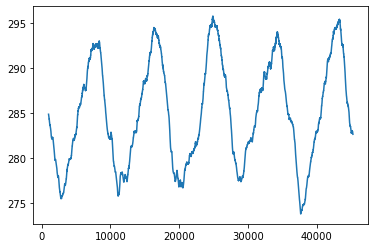

In [45]:
plt.plot(df['Portland'].rolling(1000).mean())

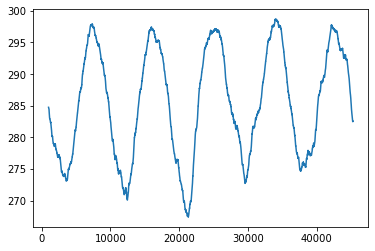

In [46]:
plt.plot(df['Philadelphia'].rolling(1000).mean())

On average, Philadelphia is colder than Portland in the winter and warmer than Portland in the summer.

### 4. For the two cities you found in for problem 4 (there are many possible answers), clean up the data via aggregation or rolling averages and plot a clear visual

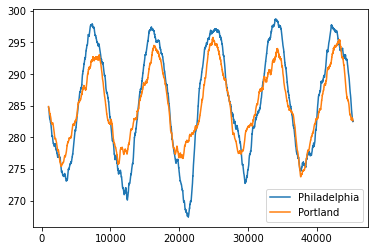

In [65]:
fig, ax = plt.subplots()
ax.plot(df['Philadelphia'].rolling(1000).mean(), label='Philadelphia')
ax.plot(df['Portland'].rolling(1000).mean(), label='Portland')
leg = ax.legend()